In [1]:
from math import sqrt
import numpy as np
from scipy import linalg
from l1threshold import soft_thresh, subgradient_proj
from proximal_grad import ista, ista2
from plotting import make_plot

In [2]:
rng = np.random.RandomState(42)
m, n = 40, 150

# random design
A = rng.randn(m, n)  # random design

x_star = rng.randn(n)
x_star[abs(x_star) < 0.8] = 0
b = np.dot(A, x_star)
L = linalg.norm(A) ** 2

In [3]:
l = 0.5 # regularization parameter

In [4]:
def oracle(x,l):
    val = 0.5 * linalg.norm(A.dot(x) - b) ** 2 + l * linalg.norm(x, 1)
    grad = np.dot(A.T, A.dot(x)-b)

    return val,grad

In [5]:
close_val,_=oracle(x_star,l)

In [6]:
x0 = rng.randn(n)
res1,grad1 = ista(oracle,soft_thresh,x0,L,l)
res2,grad2 = ista2(oracle,soft_thresh,subgradient_proj,x0,L,l)
labels=['ista','ista2']

In [7]:
close_val = min(close_val,min(np.min(res1),np.min(res2)))

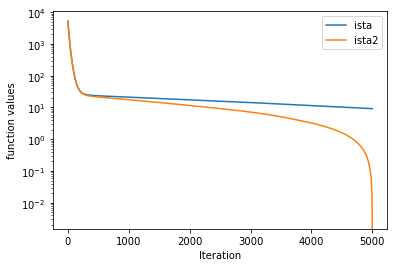

In [8]:
make_plot([res1-close_val,res2-close_val],labels,'function values')

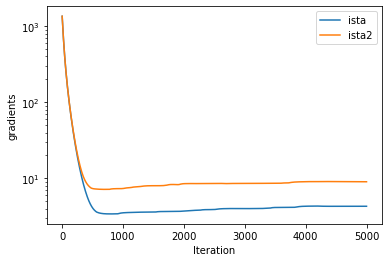

In [9]:
make_plot([grad1,grad2],labels,'gradients')